# Data preparation

In [23]:
%matplotlib notebook
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.datasets import make_regression

# 유효숫자 2
np.set_printoptions(precision=2)

<IPython.core.display.Javascript object>


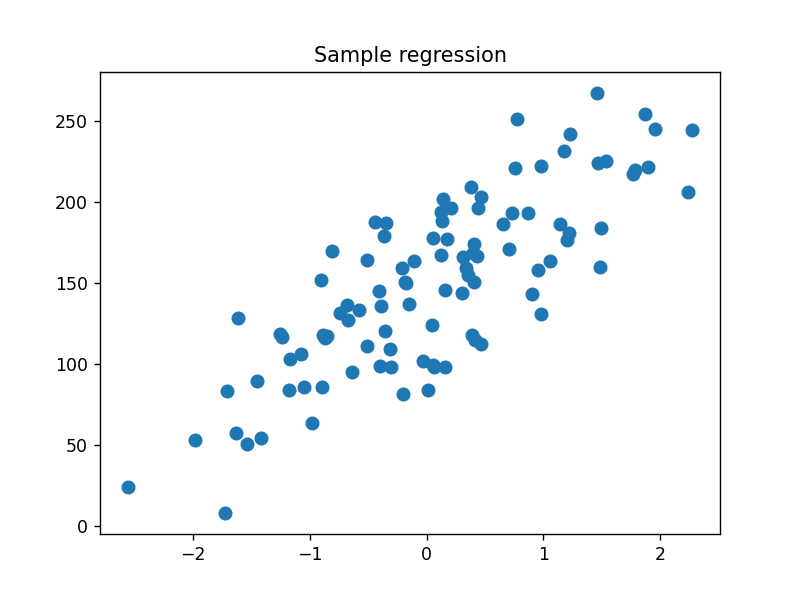

In [7]:
plt.figure()
plt.title('Sample regression')
X_R1, Y_R1 = make_regression(n_samples=100, n_features=1, n_informative=1, bias=150.0,
                            noise=30, random_state=0)
plt.scatter(X_R1, Y_R1, marker='o', s=50)
plt.show()

In [16]:
# for classification
fruits = pd.read_table('fruit_data_with_colors.txt')

x_fruits = fruits[['height', 'width', 'mass', 'color_score']]
y_fruits = fruits['fruit_label']

x_fruits_2d = fruits[['height', 'width']]
y_fruits_2d = fruits['fruit_label']

In [10]:
from sklearn.datasets import load_breast_cancer

In [11]:
# for evaluation
# 실제 data
cancer = load_breast_cancer()
(x_cancer, y_cancer) = load_breast_cancer(return_X_y=True)

In [17]:
x_fruits.head()

,height,width,mass,color_score
0,7.3,8.4,192,0.55
1,6.8,8.0,180,0.59
2,7.2,7.4,176,0.60
3,4.7,6.2,86,0.80
4,4.6,6.0,84,0.79


In [18]:
x_cancer

array([[1.799e+01, 1.038e+01, 1.228e+02, ..., 2.654e-01, 4.601e-01,
        1.189e-01],
       [2.057e+01, 1.777e+01, 1.329e+02, ..., 1.860e-01, 2.750e-01,
        8.902e-02],
       [1.969e+01, 2.125e+01, 1.300e+02, ..., 2.430e-01, 3.613e-01,
        8.758e-02],
       ...,
       [1.660e+01, 2.808e+01, 1.083e+02, ..., 1.418e-01, 2.218e-01,
        7.820e-02],
       [2.060e+01, 2.933e+01, 1.401e+02, ..., 2.650e-01, 4.087e-01,
        1.240e-01],
       [7.760e+00, 2.454e+01, 4.792e+01, ..., 0.000e+00, 2.871e-01,
        7.039e-02]])

# Linear Regression

In [20]:
from sklearn.linear_model import LinearRegression

In [27]:
x_train, x_test, y_train, y_test = train_test_split(X_R1, Y_R1, random_state=0)
linreg = LinearRegression().fit(x_train, y_train)

print('linear model coeff(w): {}'.format(linreg.coef_))     # w: 기울기
print('linear nodel intercept(b): {:.2f}'.format(linreg.intercept_))  # b: y절편
print('R-squared score (training): {:.3f}'.format(linreg.score(x_train, y_train)))   # score: 정확도
print('R-squared score (test): {:.3f}'.format(linreg.score(x_test, y_test)))

linear model coeff(w): [45.71]
linear nodel intercept(b): 148.45
R-squared score (training): 0.679
R-squared score (test): 0.492


<IPython.core.display.Javascript object>


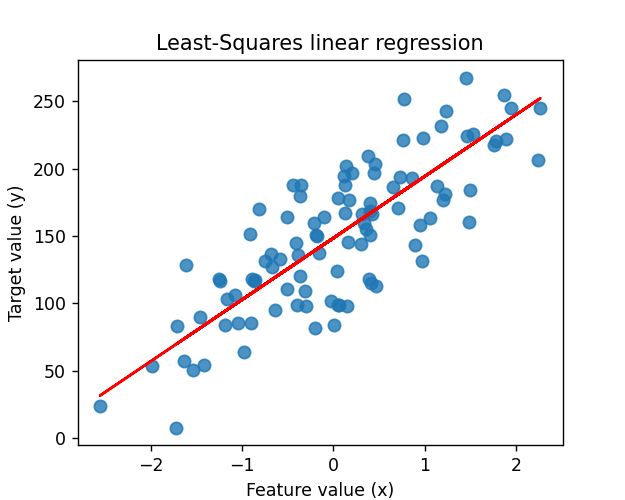

Text(0, 0.5, 'Target value (y)')

In [30]:
plt.figure(figsize=(5, 4))
plt.scatter(X_R1, Y_R1, marker='o', s=50, alpha=0.8)
plt.plot(X_R1, linreg.coef_ * X_R1 + linreg.intercept_, 'r-')
plt.title('Least-Squares linear regression')
plt.xlabel('Feature value (x)')
plt.ylabel('Target value (y)')

# Logistic Regression

In [31]:
from sklearn.linear_model import LogisticRegression

In [60]:
y_fruits_apple = y_fruits_2d == 1
x_train, x_test, y_train, y_test = train_test_split(x_fruits_2d, y_fruits_apple, random_state=0)

clf = LogisticRegression().fit(x_train, y_train)

print('Accuracy of Logistic Regression classifier on training set: {:.2f}'.format(clf.score(x_train, y_train)))
print('Accuracy of Logistic Regression classifier on test set: {:.2f}'.format(clf.score(x_test, y_test)))

Accuracy of Logistic Regression classifier on training set: 0.75
Accuracy of Logistic Regression classifier on test set: 0.67


In [61]:
clf.predict([[6, 8]])

array([ True])

In [43]:
x_train, x_test, y_train, y_test = train_test_split(x_cancer, y_cancer, random_state=0)

clf = LogisticRegression(max_iter=2000).fit(x_train, y_train)

print('Accuracy of Logistic Regression classifier on training set: {:.2f}'.format(clf.score(x_train, y_train)))
print('Accuracy of Logistic Regression classifier on test set: {:.2f}'.format(clf.score(x_test, y_test)))

Accuracy of Logistic Regression classifier on training set: 0.96
Accuracy of Logistic Regression classifier on test set: 0.95


In [65]:
print(clf.coef_)
print(clf.intercept_)

[[-0.61  1.46]]
[-6.53]


# Support Vector Machine

In [44]:
from sklearn.svm import SVC

In [49]:
y_fruits_apple = y_fruits_2d == 1
x_train, x_test, y_train, y_test = train_test_split(x_fruits_2d, y_fruits_apple, random_state=0)

clf = SVC(kernel='linear').fit(x_train, y_train)

print('Accuracy of SVC classifier on training set: {:.2f}'.format(clf.score(x_train, y_train)))
print('Accuracy of SVC classifier on test set: {:.2f}'.format(clf.score(x_test, y_test)))

Accuracy of SVC classifier on training set: 0.84
Accuracy of SVC classifier on test set: 0.67


In [50]:
x_train, x_test, y_train, y_test = train_test_split(x_cancer, y_cancer, random_state=0)

clf = SVC(kernel='linear').fit(x_train, y_train)

print('Accuracy of SVC classifier on training set: {:.2f}'.format(clf.score(x_train, y_train)))
print('Accuracy of SVC classifier on test set: {:.2f}'.format(clf.score(x_test, y_test)))

Accuracy of SVC classifier on training set: 0.97
Accuracy of SVC classifier on test set: 0.96


-> Logistic Regression보다 좀 더 좋은 성능을 보임

# Decision Tree

In [47]:
from sklearn.tree import DecisionTreeClassifier

In [51]:
y_fruits_apple = y_fruits_2d == 1
x_train, x_test, y_train, y_test = train_test_split(x_fruits_2d, y_fruits_apple, random_state=0)

clf = DecisionTreeClassifier().fit(x_train, y_train)

print('Accuracy of Decision Tree classifier on training set: {:.2f}'.format(clf.score(x_train, y_train)))
print('Accuracy of Decision Tree classifier on test set: {:.2f}'.format(clf.score(x_test, y_test)))

Accuracy of Decision Tree classifier on training set: 1.00
Accuracy of Decision Tree classifier on test set: 0.67


In [52]:
x_train, x_test, y_train, y_test = train_test_split(x_cancer, y_cancer, random_state=0)

clf = DecisionTreeClassifier().fit(x_train, y_train)

print('Accuracy of Decision Tree classifier on training set: {:.2f}'.format(clf.score(x_train, y_train)))
print('Accuracy of Decision Tree classifier on test set: {:.2f}'.format(clf.score(x_test, y_test)))

Accuracy of Decision Tree classifier on training set: 1.00
Accuracy of Decision Tree classifier on test set: 0.92


- overfitting이 많이 발생함
- training set에 대해 학습을 잘하지만, test set에 대해 overfitting의 문제가 발생할 수 있음

# Random Forest

In [53]:
from sklearn.ensemble import RandomForestClassifier

In [54]:
y_fruits_apple = y_fruits_2d == 1
x_train, x_test, y_train, y_test = train_test_split(x_fruits_2d, y_fruits_apple, random_state=0)

clf = RandomForestClassifier(n_estimators=10, random_state=0).fit(x_train, y_train)

print('Accuracy of Random Forest classifier on training set: {:.2f}'.format(clf.score(x_train, y_train)))
print('Accuracy of Random Forest classifier on test set: {:.2f}'.format(clf.score(x_test, y_test)))

Accuracy of Random Forest classifier on training set: 1.00
Accuracy of Random Forest classifier on test set: 0.67


In [55]:
x_train, x_test, y_train, y_test = train_test_split(x_cancer, y_cancer, random_state=0)

clf = RandomForestClassifier(n_estimators=10, random_state=0).fit(x_train, y_train)

print('Accuracy of Random Forest classifier on training set: {:.2f}'.format(clf.score(x_train, y_train)))
print('Accuracy of Random Forest classifier on test set: {:.2f}'.format(clf.score(x_test, y_test)))

Accuracy of Random Forest classifier on training set: 1.00
Accuracy of Random Forest classifier on test set: 0.95


In [56]:
x_train, x_test, y_train, y_test = train_test_split(x_cancer, y_cancer, random_state=0)

clf = RandomForestClassifier(max_features=8, n_estimators=10, random_state=0).fit(x_train, y_train)

print('Accuracy of Random Forest classifier on training set: {:.2f}'.format(clf.score(x_train, y_train)))
print('Accuracy of Random Forest classifier on test set: {:.2f}'.format(clf.score(x_test, y_test)))

Accuracy of Random Forest classifier on training set: 1.00
Accuracy of Random Forest classifier on test set: 0.99


-> `max_features` feature에 대한 제한 설정 시 더 좋은 성능을 보임